8. This question involves the use of simple linear regression on the Auto
data set.

(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
auto = pd.read_csv('Auto.csv',na_values=['?'])
auto = auto.dropna()
y = auto['mpg']
X = pd.DataFrame({'intercept':np.ones(auto.shape[0]),'horsepower': auto.horsepower.astype('float')})
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


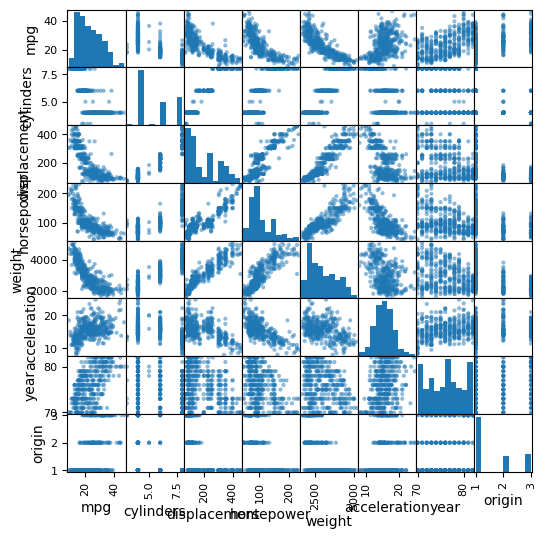

In [4]:
pd.plotting.scatter_matrix(auto,figsize=[6,6]);

i. Is there a relationship between the predictor and the response?
    - Yes, since the p-value is zero, there is a relationship.

ii. How strong is the relationship between the predictor and
the response?
    - Standart error close to 0, and p-value is zero, therefore relationship is very strong.

iii. Is the relationship between the predictor and the response
positive or negative?
    - Negative as the coefficient is negative, therefore as horsepower increases mpg decreases.

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?
    - mpg associated with horsepower 98 is 24.47. Conf interval = [23.97,24.96] pred interval = [14.8,34.12]

In [5]:
new_data = pd.DataFrame({'intercept': 1, 'horsepower': [98]})

# Make predictions
predictions = results.get_prediction(new_data)

# Display predictions
print(predictions.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [6]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

C:\Users\akbas\AppData\Local\Temp\ipykernel_22080\1524998780.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,results.params[0]), slope=results.params[1],color='r')


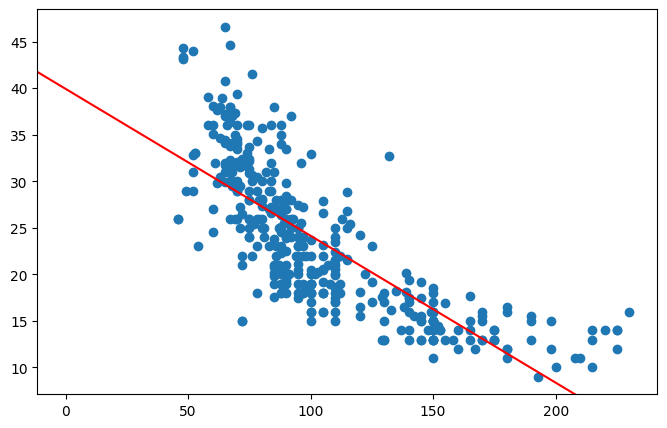

In [7]:
ax = subplots(figsize=(8,5))[1]
ax.scatter(X['horsepower'],y)
ax.axline((0,results.params[0]), slope=results.params[1],color='r')

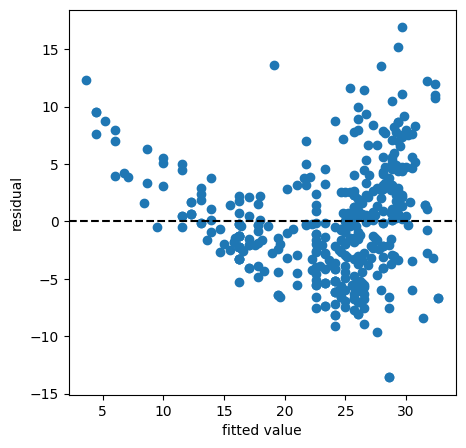

In [8]:
ax1 = subplots(figsize=(5,5))[1]
ax1.scatter(results.fittedvalues,results.resid)
ax1.set_xlabel('fitted value')
ax1.set_ylabel('residual')
ax1.axhline(0,c='k',ls='--')

115

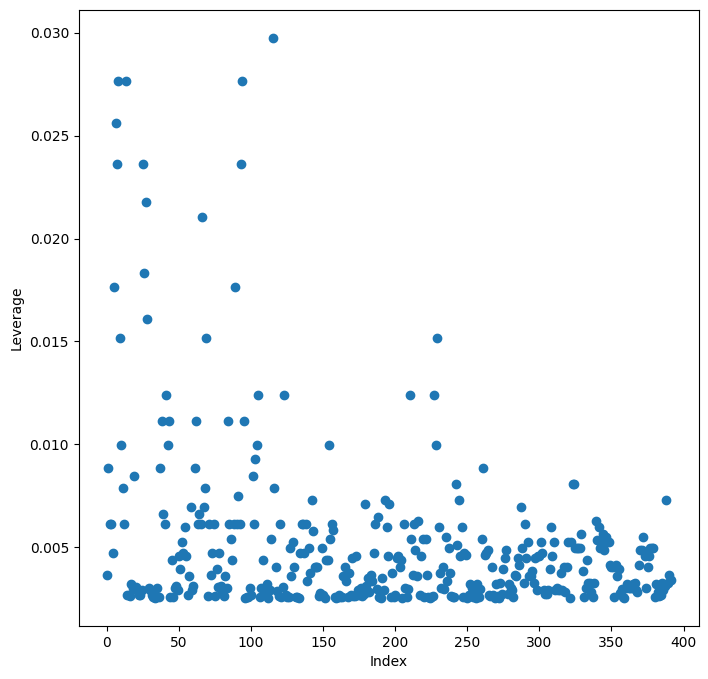

In [9]:
infl = results.get_influence()
ax2 = subplots(figsize=(8,8))[1]
ax2.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax2.set_xlabel('Index')
ax2.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

    - Residuals seem to have a pattern like a funnel shape. Transforming response mpg, with concave function might fix the issue. Also there are some high leverage points in the data

9. This question involves the use of multiple linear regression on the
Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

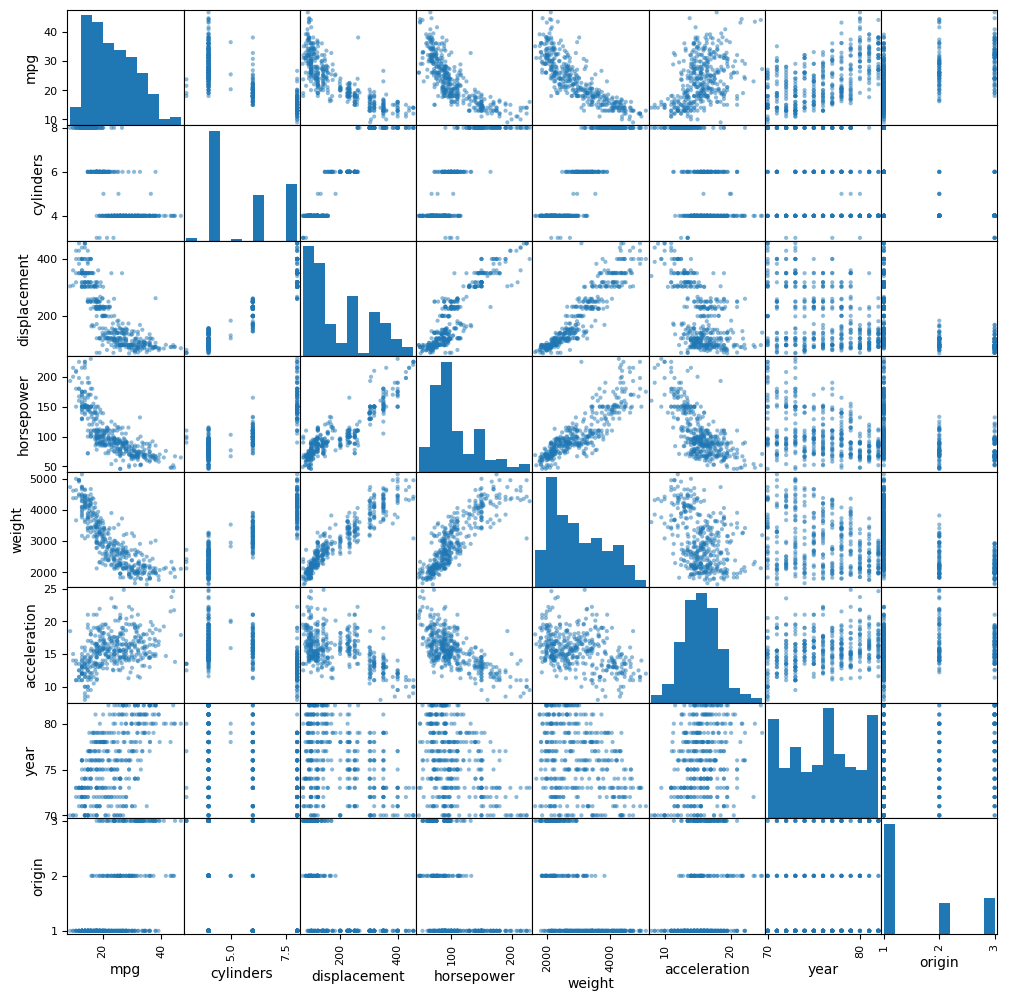

In [10]:
pd.plotting.scatter_matrix(auto,figsize=(12,12));

(b) Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

In [11]:
auto.select_dtypes(include=['number']).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:

In [12]:
y = auto['mpg']
X = auto.drop(columns=['mpg','name'])
model = sm.OLS(y,X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
cylinders,-0.7055,0.323,-2.181,0.030
displacement,0.0219,0.008,2.871,0.004
horsepower,-0.0396,0.013,-3.147,0.002
weight,-0.0060,0.001,-9.258,0.000
acceleration,-0.0796,0.090,-0.881,0.379
year,0.5836,0.024,24.150,0.000
origin,1.3100,0.281,4.663,0.000


i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
answer this question.

    - According to p-values there is relationship between cylinders, displacement, horsepower, weight, year, and origin with the response.

ii. Which predictors appear to have a statistically significant
relationship to the response

    - cylinders, displacement, horsepower, weight, year, and origin

iii. What does the coefficient for the year variable suggest?

    - 10 year increases mpg by 5.8.

(d) Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

- Residuals seem to have a pattern, also there are some points that have unusual residuals, and there are some high leverage points.

Text(0, 0.5, 'Residual')

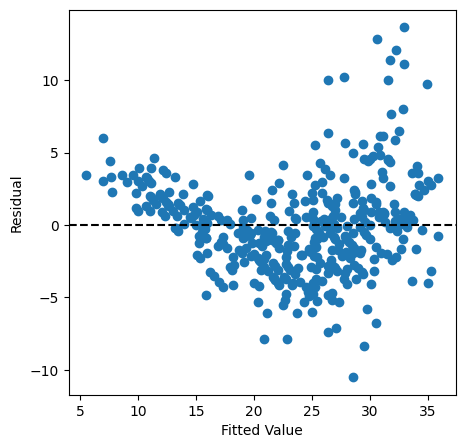

In [13]:
ax = subplots(figsize=(5,5))[1]
ax.scatter(result.fittedvalues,result.resid)
ax.axhline(y=0,color='k',ls='--')
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')

Text(0, 0.5, 'leverage')

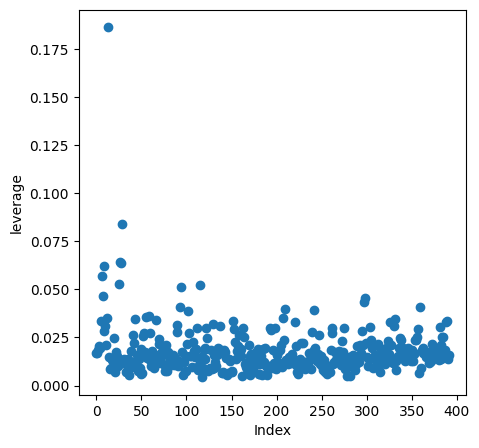

In [14]:
infl = result.get_influence()
ax3 = subplots(figsize=(5,5))[1]
ax3.scatter(np.arange(X.shape[0]),infl.hat_matrix_diag)
ax3.set_xlabel('Index')
ax3.set_ylabel('leverage')

(e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

- Interaction between horsepower and displacement, and also weight and displacement appear to be significant.

In [15]:
cols = list(auto.drop(columns=['name','mpg']).columns)
X = MS(cols + [('cylinders','displacement'),('horsepower','displacement'),('weight','displacement')]).fit_transform(auto)
model2 = sm.OLS(y,X)
result2 = model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,-2.41660,4.438000,-0.545,0.586
cylinders,0.82140,0.618000,1.329,0.185
displacement,-0.07780,0.013000,-5.822,0.000
horsepower,-0.14880,0.029000,-5.222,0.000
weight,-0.00620,0.001000,-4.443,0.000
acceleration,-0.13120,0.097000,-1.357,0.175
year,0.75660,0.045000,16.822,0.000
origin,0.57970,0.258000,2.247,0.025
cylinders:displacement,-0.00140,0.003000,-0.516,0.606
horsepower:displacement,0.00040,0.000083,4.481,0.000


In [16]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     246.0
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          1.96e-159
Time:                        22:34:11   Log-Likelihood:                -967.41
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     381   BIC:                             2000.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                  -2.4166      4.438     -0.545      0.586     -11.142       6.309
cylinders                   0.8214      0.618      1.329      0.185      -0.394       2.037
displacement               -0.0778      0.013     -5.822      0.000      -0.104      -0.052
horsepower                 -0.1488      0.029     -5.222      0.000      -0.205      -0.093
weight                     -0.0062      0.001     -4.443      0.000      -0.009      -0.003
acceleration               -0.1312      0.097     -1.357      0.175      -0.321       0.059
year                        0.7566      0.045     16.822      0.000       0.668       0.845
origin                      0.5797      0.258      2.247      0.025       0.072       1.087
cylinders:displacement     -0.0014      0.003     -0.516      0.606      -0.007       0.004
horsepower:displacement     0.0004   8.27e-05      4.481      0.000       0.000       0.001
weight:displacement      1.046e-05   4.37e-06      2.393      0.017    1.87e-06     1.9e-05
==============================================================================
Omnibus:                       47.260   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.455
Skew:                           0.662   Prob(JB):                     6.89e-22
Kurtosis:                       5.053   Cond. No.                     2.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(f) Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.

- Taking the square root of response variable seem to increase R^2 statistic, which shows more of the response is explained by the model.

In [17]:
y2 = auto['mpg']**(1/2)
model3 = sm.OLS(y2,X)
result3 = model3.fit()
result3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     293.8
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          2.93e-172
Time:                        22:34:11   Log-Likelihood:                -45.487
No. Observations:                 392   AIC:                             113.0
Df Residuals:                     381   BIC:                             156.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                   2.3162      0.422      5.483      0.000       1.486       3.147
cylinders                   0.0524      0.059      0.890      0.374      -0.063       0.168
displacement               -0.0064      0.001     -4.996      0.000      -0.009      -0.004
horsepower                 -0.0143      0.003     -5.253      0.000      -0.020      -0.009
weight                     -0.0006      0.000     -4.342      0.000      -0.001      -0.000
acceleration               -0.0162      0.009     -1.760      0.079      -0.034       0.002
year                        0.0741      0.004     17.296      0.000       0.066       0.082
origin                      0.0523      0.025      2.130      0.034       0.004       0.101
cylinders:displacement     -0.0001      0.000     -0.456      0.649      -0.001       0.000
horsepower:displacement   3.33e-05   7.87e-06      4.231      0.000    1.78e-05    4.88e-05
weight:displacement      7.515e-07   4.16e-07      1.807      0.072   -6.64e-08    1.57e-06
==============================================================================
Omnibus:                       20.566   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.737
Skew:                           0.338   Prob(JB):                     1.74e-08
Kurtosis:                       4.316   Cond. No.                     2.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

10. This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US

In [18]:
from ISLP import load_data
carseats = load_data('Carseats')
carseats.columns
carseats.head

<bound method NDFrame.head of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Educ

In [19]:
y = carseats.Sales
X = MS(['Price','Urban','US']).fit_transform(carseats)
model4 = sm.OLS(y,X)
result4 = model4.fit()
summarize(result4)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

- For every 100 increase in price result in 5 thousand loss in sales, if urban area 200 decrease in sales, if in US sales increases by 1.2 thousand.

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.
- Sales = 13.04 - 0.054 * Price - 0.021 * Urban (1 or 0) + 1.2 * US (1 or 0)

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

- For price and US we can reject null hypothesis since p-values are smaller than 0.05

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [20]:
X = MS(['Price','US']).fit_transform(carseats)
model5 = sm.OLS(y,X)
result5 = model5.fit()
summarize(result5)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [21]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        22:34:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        22:34:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

- R^2 statistic is the same for two model, therefore they both do same to fit the data.

(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [23]:

result5.conf_int(alpha=0.05)


,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

- From residual plot it seems like there is no outliers, but there are some high leverage points it can be seen from leverage plot.

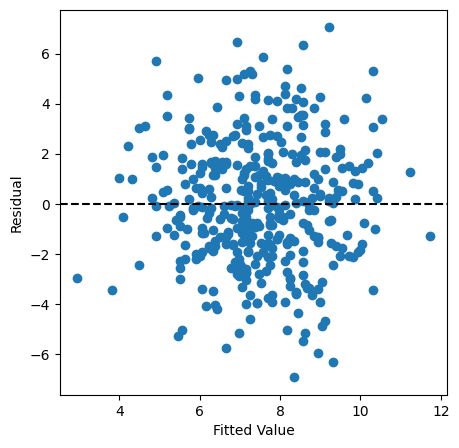

In [24]:
ax4 = subplots(figsize=(5,5))[1]
ax4.scatter(result5.fittedvalues,result5.resid)
ax4.set_xlabel('Fitted Value')
ax4.set_ylabel('Residual')
ax4.axhline(0,c='k',ls='--')

Text(0, 0.5, 'leverage')

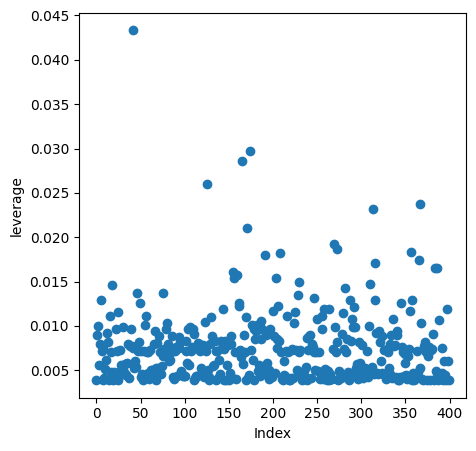

In [25]:
infl1 = result5.get_influence()
ax5 = subplots(figsize=(5,5))[1]
ax5.scatter(np.arange(X.shape[0]),infl1.hat_matrix_diag)
ax5.set_xlabel('Index')
ax5.set_ylabel('leverage')

11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [26]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of
this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the keywords argument intercept=False to ModelSpec().)

In [27]:
model6 = sm.OLS(y,x)
result6 = model6.fit()
summarize(result6)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


- Coefficient is 1.97, std error is 0.117, t-statistics is 16.89 and p-value is 0.0 which shows significance with response variable.

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

In [28]:
model7 = sm.OLS(x,y)
result7 = model7.fit()
summarize(result7)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


- coef: 0.37, std err: 0.02, t: 16.898, p-value < 0.05. Statistically significant.

(c) What is the relationship between the results obtained in (a) and
(b)?

- they have same t-statistic, different coef.

(d) For the regression of Y onto X without an intercept, the tstatistic for H0 : β = 0 takes the form β/ ˆ SE(βˆ), where βˆ is
given by (3.38), and where
SE(βˆ) = √∑n i=1(yi − xiβˆ)2
(n − 1) ∑n i′=1 x2 i′ .
(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression
without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as
(√n − 1) ∑n i=1 xiyi
√(∑n i=1 x2 i )(∑n i′=1 yi2′) − (∑n i′=1 xi′yi′)2

<img src="ch03_11.jpg" alt="t-stat" width="300">

(e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression
of x onto y.

- Since we end up with a equation that is interchangable with x and y, i.e., changing position of x and y does not make a difference, we can conclude that t-statistics does not change without an intercept.

(f) In R, show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

In [29]:
X_new = pd.DataFrame({'intercept': 1,'x_value': x})
model8 = sm.OLS(y,X_new)
result8 = model8.fit()
summarize(result8)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x_value,1.9686,0.118,16.734,0.000


In [30]:
y_new = pd.DataFrame({'intercept':1,'y_value': y})
model9 = sm.OLS(x,y_new)
result9 = model9.fit()
summarize(result9)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y_value,0.3763,0.022,16.734,0.000


12. This problem involves simple linear regression without an intercept.
(a) Recall that the coefficient estimate βˆ for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

- When sum of squares of x and y's are equal.

(b) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.

In [31]:
x1 = rng.normal(size=100)
y1 = 3 * x + rng.normal(size=100)

model_y1 = sm.OLS(y1,x1)
result_y1 = model_y1.fit()
summarize(result_y1)

,coef,std err,t,P>|t|
x1,0.1049,0.306,0.343,0.733


In [32]:
model_x1 = sm.OLS(x1,y1)
result_x1 = model_x1.fit()
summarize(result_x1)

,coef,std err,t,P>|t|
x1,0.0113,0.033,0.343,0.733


(c) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

In [33]:
# Scale Y to ensure the sum of squares condition
x2 = rng.normal(size=100)
y2 = rng.normal(size=100)
Y = y2 * np.sqrt(np.sum(x2**2) / np.sum(y2**2))

model_y2 = sm.OLS(Y,x2)
result_y2 = model_y2.fit()
summarize(result_y2)

,coef,std err,t,P>|t|
x1,-0.0755,0.1,-0.754,0.453


In [34]:
model_x2 = sm.OLS(x2,Y)
result_x2 = model_x2.fit()
summarize(result_x2)

,coef,std err,t,P>|t|
x1,-0.0755,0.1,-0.754,0.453


13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.

(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [35]:
x3 = rng.normal(size=100,loc=0,scale=1)

(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [36]:
eps = rng.normal(size=100,loc=0,scale=0.25)

(c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + ϵ. (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?

- B0 is -1 and B1 is 0.5, length is 100

In [37]:
Y = -1 + 0.5 * x3 + eps
Y.shape

(100,)

(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.
- Linear relationship exist between x and Y

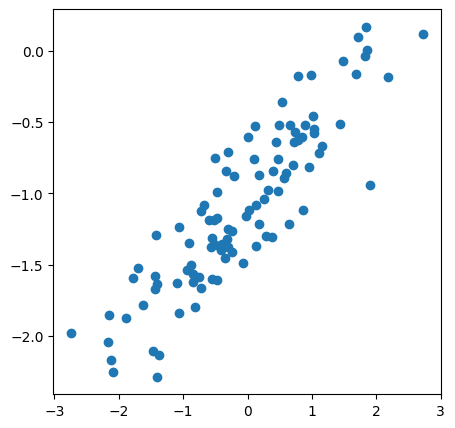

In [38]:
ax6 = subplots(figsize=(5,5))[1]
ax6.scatter(x3,Y)

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?
- B0' is -1.01, B1' is 0.52, very close to B0 and B1

In [39]:
mod = sm.OLS(Y,pd.DataFrame({'intercept':1,'x':x3}))
res = mod.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,-1.0510,0.027,-39.300,0.0
x,0.4645,0.025,18.898,0.0


(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() method of the axes to create an appropriate legend.

In [40]:
res.params[1]

C:\Users\akbas\AppData\Local\Temp\ipykernel_22080\19185765.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res.params[1]


0.4644500955879459

C:\Users\akbas\AppData\Local\Temp\ipykernel_22080\1695108380.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line1= ax6.axline((0,res.params[0]),slope=res.params[1],c='r')


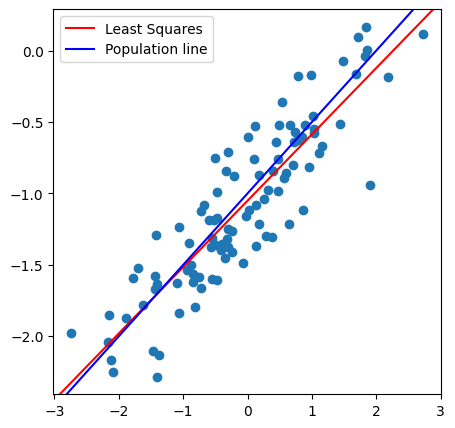

In [41]:
ax6 = subplots(figsize=(5,5))[1]
ax6.scatter(x3,Y)
line1= ax6.axline((0,res.params[0]),slope=res.params[1],c='r')
line1.set_label('Least Squares')
line2 =ax6.axline((0,-1),slope=0.5,c='b')
line2.set_label('Population line')
ax6.legend()

(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

- No, its p-value shows quadratic term is insignificant, and also R2 is not improved.

In [42]:
mod1 = sm.OLS(Y, pd.DataFrame({'intercept':1,'x':x3,'x^2':x**2}))
res1 = mod1.fit()
summarize(res1)

,coef,std err,t,P>|t|
intercept,-1.0370,0.031,-33.005,0.000
x,0.4642,0.025,18.861,0.000
x^2,-0.0192,0.023,-0.854,0.395


In [43]:
res.summary()
res.conf_int(alpha=0.05)

,0,1
intercept,-1.104115,-0.997969
x,0.415679,0.513221


In [44]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.14e-33
Time:                        22:34:11   Log-Likelihood:                -8.2651
No. Observations:                 100   AIC:                             22.53
Df Residuals:                      97   BIC:                             30.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0370      0.031    -33.005      0.000      -1.099      -0.975
x              0.4642      0.025     18.861      0.000       0.415       0.513
x^2           -0.0192      0.023     -0.854      0.395      -0.064       0.025
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.531
Skew:                          -0.157   Prob(JB):                        0.767
Kurtosis:                       2.829   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
ϵ in (b). Describe your results.

- coef and intercept closer to population values

,coef,std err,t,P>|t|
intercept,-1.0038,0.005,-205.736,0.0
x,0.5050,0.005,105.656,0.0


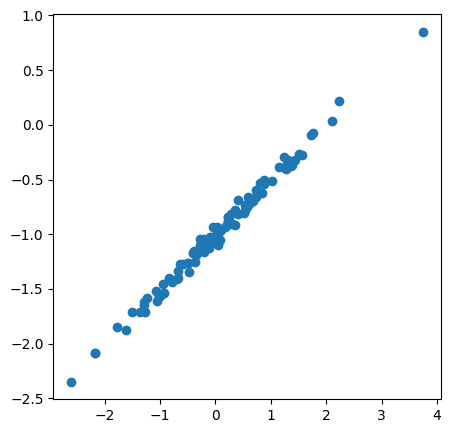

In [45]:
x3 = rng.normal(size=100,loc=0,scale=1)
eps = rng.normal(size=100,loc=0,scale=0.05)
Y = -1 + 0.5 * x3 + eps
Y.shape
ax6 = subplots(figsize=(5,5))[1]
ax6.scatter(x3,Y)
mod = sm.OLS(Y,pd.DataFrame({'intercept':1,'x':x3}))
res2 = mod.fit()
summarize(res2)


In [46]:
res2.conf_int(alpha=0.05)

,0,1
intercept,-1.013491,-0.994126
x,0.495514,0.514484


C:\Users\akbas\AppData\Local\Temp\ipykernel_22080\1695108380.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line1= ax6.axline((0,res.params[0]),slope=res.params[1],c='r')


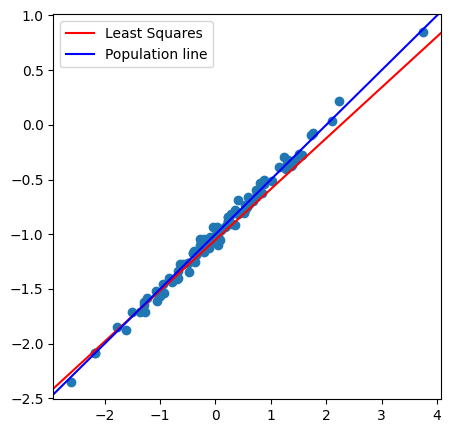

In [47]:
ax6 = subplots(figsize=(5,5))[1]
ax6.scatter(x3,Y)
line1= ax6.axline((0,res.params[0]),slope=res.params[1],c='r')
line1.set_label('Least Squares')
line2 =ax6.axline((0,-1),slope=0.5,c='b')
line2.set_label('Population line')
ax6.legend()

(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term ϵ in (b). Describe your results.

- Coef and intercept little bit far from population values, but not by much which shows consistency.

,coef,std err,t,P>|t|
intercept,-0.9669,0.040,-23.878,0.0
x,0.5983,0.039,15.383,0.0


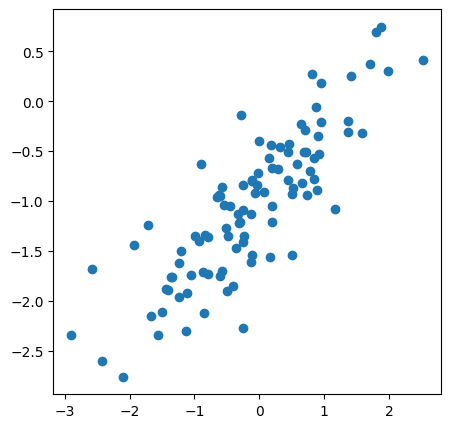

In [48]:
x3 = rng.normal(size=100,loc=0,scale=1)
eps = rng.normal(size=100,loc=0,scale=0.4)
Y = -1 + 0.5 * x3 + eps
Y.shape
ax6 = subplots(figsize=(5,5))[1]
ax6.scatter(x3,Y)
mod = sm.OLS(Y,pd.DataFrame({'intercept':1,'x':x3}))
res3 = mod.fit()
summarize(res3)


In [49]:
res3.conf_int(alpha=0.05)

,0,1
intercept,-1.047272,-0.886553
x,0.521089,0.675443


(j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

- Increasing the uncertainty causes confidence interval to become larger, because we have more variability.

This problem focuses on the collinearity problem.
(a) Perform the following commands in Python:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

- B0 is 2, B1 is 2, B2 is 0.3

In [3]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

- corr(x1,x2) = 0.77, and scatter plot shows linear relationship

Text(0, 0.5, 'x2')

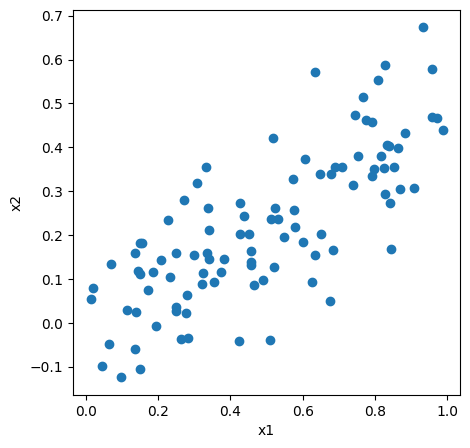

In [4]:
ax = subplots(figsize=(5,5))[1]
ax.scatter(x1,x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [5]:
pd.DataFrame({'x1':x1,'x2':x2}).corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

- intercept is close to true B0, however, coefficients of x1 and x2 is not close to true value. We can reject null hypothesis for x1, but not for x2. 

In [7]:
mod = sm.OLS(y,pd.DataFrame({'intercept':1,'x1':x1,'x2':x2}))
res = mod.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


(d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

- we can reject, and coefficient is close to true value

In [8]:
mod = sm.OLS(y,pd.DataFrame({'intercept':1,'x1':x1}))
res = mod.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


(e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

- we can reject H0., coefficient is different, and x2 coefficient is much higher.

In [9]:
mod = sm.OLS(y,pd.DataFrame({'intercept':1,'x2':x2}))
res = mod.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

- Yes it does, because at (c), x2 was not statistically significant but at (e) its statistically significant.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to
add this additional observation to each of x1, x2 and y.

In [10]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

- X2 is now statistically significant at (c). It increased the standart error of both terms at both models, therefore this suggests this point is outlier.

In [11]:
mod = sm.OLS(y,pd.DataFrame({'intercept':1,'x1':x1,'x2':x2}))
res = mod.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [12]:
mod = sm.OLS(y,pd.DataFrame({'intercept':1,'x2':x2}))
res = mod.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

- Except chas, every predictor seem to have relationship, since p-values are smaller than 0.05.

In [17]:
from ISLP import load_data
boston = load_data('Boston')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [44]:
y = boston.crim
univariate_coefs=[]
for i in boston.drop(columns='crim').columns:
    mod = sm.OLS(y,pd.DataFrame({'intercept':1, i: boston[i]}))
    res = mod.fit()
    univariate_coefs.append(res.params[1])
    print(summarize(res))


             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

C:\Users\akbas\AppData\Local\Temp\ipykernel_2728\1989249137.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(res.params[1])
C:\Users\akbas\AppData\Local\Temp\ipykernel_2728\1989249137.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(res.params[1])
C:\Users\akbas\AppData\Local\Temp\ipykernel_2728\1989249137.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.appen

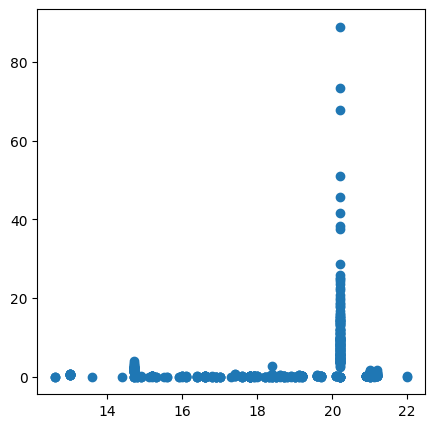

In [25]:
ax = subplots(figsize=(5,5))[1]
ax.scatter(boston.ptratio,boston.crim)

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [29]:
boston.shape[0]

506

In [45]:
new_df = boston.drop(columns=['crim'])
new_df.insert(0,'intercept',1)
mod = sm.OLS(y,new_df)
res = mod.fit()
multivariate_coefs = res.params[1:]
summarize(res)



,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


- For indus, chas,nox, rm, age, tax, ptratio, lstat we can not reject null hypothesis, for zn, dis, rad, and medv we can reject H0.

(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

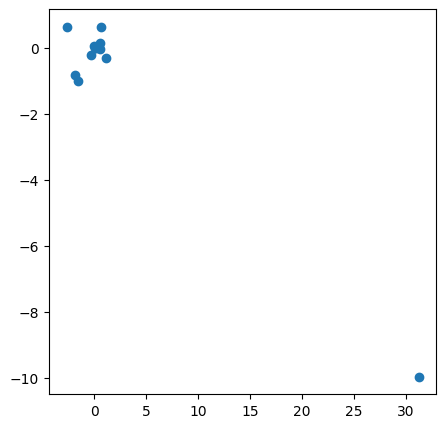

In [46]:
ax = subplots(figsize=(5,5))[1]
ax.scatter(univariate_coefs,multivariate_coefs)

(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + ϵ

In [48]:
for i in boston.drop(columns='crim').columns:
    mod = sm.OLS(y,pd.DataFrame({'intercept':1, i: boston[i],i+'^2':boston[i]**2,i+'^3':boston[i]**3}))
    res = mod.fit()
    print(summarize(res))

               coef   std err       t  P>|t|
intercept  4.846100  0.433000  11.192  0.000
zn        -0.332200  0.110000  -3.025  0.003
zn^2       0.006500  0.004000   1.679  0.094
zn^3      -0.000038  0.000031  -1.203  0.230
             coef  std err      t  P>|t|
intercept  3.6626    1.574  2.327   0.02
indus     -1.9652    0.482 -4.077   0.00
indus^2    0.2519    0.039  6.407   0.00
indus^3   -0.0070    0.001 -7.292   0.00
                   coef       std err      t  P>|t|
intercept  3.744400e+00  3.970000e-01  9.444  0.000
chas       1.114000e+14  2.710000e+14  0.411  0.681
chas^2    -5.610000e+13  1.370000e+14 -0.411  0.681
chas^3    -5.532000e+13  1.350000e+14 -0.411  0.681
                coef  std err      t  P>|t|
intercept   233.0866   33.643  6.928    0.0
nox       -1279.3713  170.397 -7.508    0.0
nox^2      2248.5441  279.899  8.033    0.0
nox^3     -1245.7029  149.282 -8.345    0.0
               coef  std err      t  P>|t|
intercept  112.6246   64.517  1.746  0.081
rm  

- indus, nox, age, dis, ptratio and medv shows non-linear association as their square and cubic p-values lower than 0.05